In [1]:
# This Code Does an Import of a CSV file an alternative may be an excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')


#Phase 1 collecting the data
pd.set_option("expand_frame_repr", False) #Avoids Printing on the next line when you import a dataset
df= pd.read_csv('C:/Users/Marc/Dropbox/University of Pretoria/791/Cheat Sheet/FUN Datasets/property_data.csv')
df.columns =["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","LSTAT","MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,67.982016,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.532006,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,43.475000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,93.875000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Axes: xlabel='MEDV', ylabel='Count'>

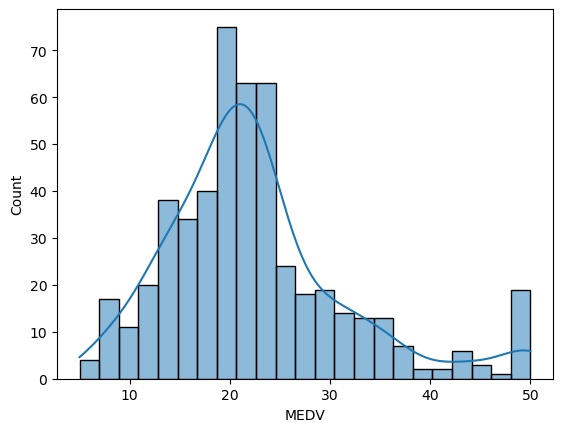

In [3]:
sns.histplot(data=df, x="MEDV", kde=True)

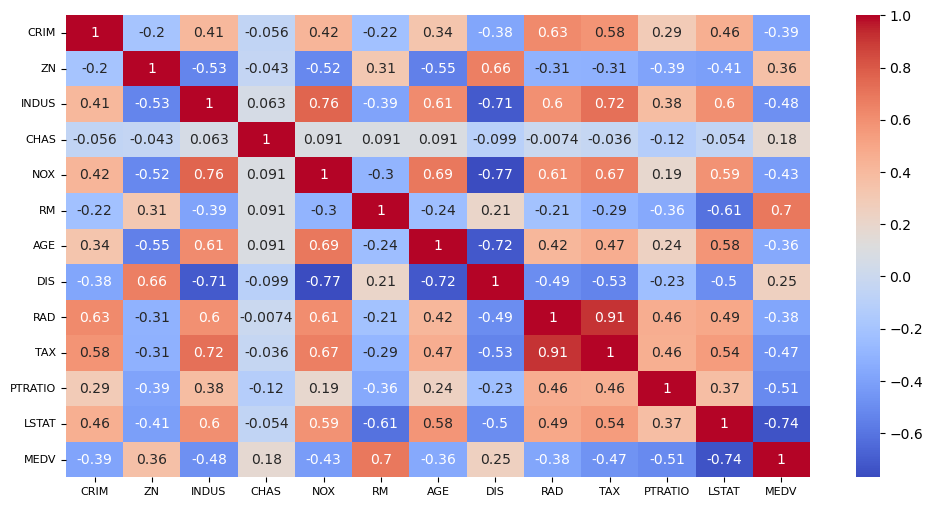

In [4]:
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

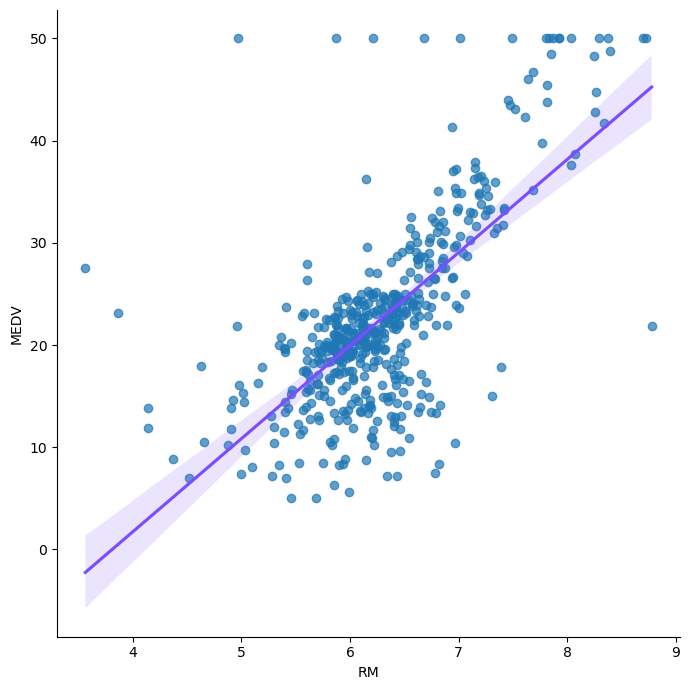

In [5]:
sns.lmplot(x="RM", y="MEDV", data=df, height=7, scatter_kws={'alpha':0.7}, line_kws={'color':'#7C4DFF'})
plt.show()

In [6]:
#Can we actually determine the type of species based on the bill length, bill depth, flipper length and body mass 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Convert levels to numeric
feature_encoder= LabelEncoder()
df['CRIM'] = feature_encoder.fit_transform(df['CRIM'])
df['ZN'] = feature_encoder.fit_transform(df['ZN'])
df['INDUS'] = feature_encoder.fit_transform(df['INDUS'])
df['CHAS'] = feature_encoder.fit_transform(df['CHAS'])
df['NOX'] = feature_encoder.fit_transform(df['NOX'])
df['RM'] = feature_encoder.fit_transform(df['RM'])
df['AGE'] = feature_encoder.fit_transform(df['AGE'])
df['DIS'] = feature_encoder.fit_transform(df['DIS'])
df['RAD'] = feature_encoder.fit_transform(df['RAD'])
df['TAX'] = feature_encoder.fit_transform(df['TAX'])
df['PTRATIO'] = feature_encoder.fit_transform(df['PTRATIO'])
df['LSTAT'] = feature_encoder.fit_transform(df['LSTAT'])


# Define the input features (Defender Score, Attacker Score, Log Time)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [8]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test,y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7337895489177254
Test data r-squared: 0.717270887159696
Intercept 43.466876857735876


,coef
CRIM,0.007699
ZN,-0.125675
INDUS,-0.044003
CHAS,3.329627
NOX,-0.080087
RM,0.012634
AGE,0.004529
DIS,-0.019261
RAD,0.211347
TAX,-0.071936


In [9]:
df['MEDV'].skew()

1.1080984082549072

In [10]:
medv_log_transformed = np.log(df["MEDV"])
medv_log_transformed.skew()

-0.33032129530987864

Text(0.5, 1.0, 'Property price with log transformation')

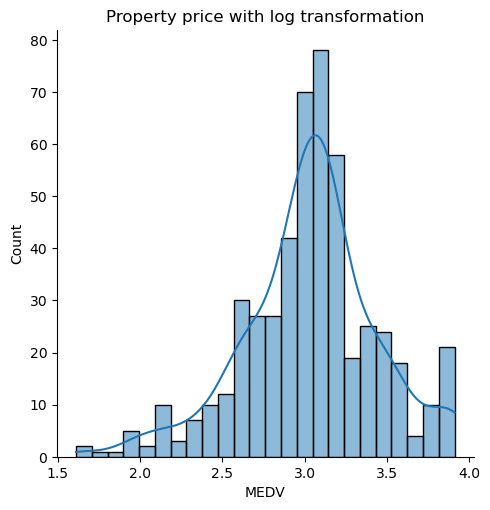

In [11]:
sns.displot(medv_log_transformed, kde=True)
plt.title("Property price with log transformation")

In [12]:
df['medv_log_transformed']= np.log(df["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,medv_log_transformed
0,0,3,19,0,51,320,173,297,0,34,9,53,24.0,3.178054
1,23,0,56,0,36,279,226,333,1,11,23,161,21.6,3.072693
2,22,0,56,0,36,400,160,333,1,11,23,28,34.7,3.546740
3,32,0,16,0,33,383,113,361,2,5,31,6,33.4,3.508556
4,110,0,16,0,33,395,140,361,2,5,31,64,36.2,3.589059


In [26]:
# Convert levels to numeric
feature_encoder= LabelEncoder()
df['CRIM'] = feature_encoder.fit_transform(df['CRIM'])
df['ZN'] = feature_encoder.fit_transform(df['ZN'])
df['INDUS'] = feature_encoder.fit_transform(df['INDUS'])
df['CHAS'] = feature_encoder.fit_transform(df['CHAS'])
df['NOX'] = feature_encoder.fit_transform(df['NOX'])
df['RM'] = feature_encoder.fit_transform(df['RM'])
df['AGE'] = feature_encoder.fit_transform(df['AGE'])
df['DIS'] = feature_encoder.fit_transform(df['DIS'])
df['RAD'] = feature_encoder.fit_transform(df['RAD'])
df['TAX'] = feature_encoder.fit_transform(df['TAX'])
df['PTRATIO'] = feature_encoder.fit_transform(df['PTRATIO'])
df['LSTAT'] = feature_encoder.fit_transform(df['LSTAT'])


# Define the input features (Defender Score, Attacker Score, Log Time)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['medv_log_transformed']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [28]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test,y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7321586307806947
Test data r-squared: 0.7181931938758924
Intercept 3.7621342962886537


,coef
CRIM,-0.000054
ZN,-0.007273
INDUS,-0.000229
CHAS,0.131028
NOX,-0.001763
RM,0.000393
AGE,0.000194
DIS,-0.000201
RAD,0.004861
TAX,-0.002400
